In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500
sns.set_style('darkgrid')
sns.color_palette('pastel')
%matplotlib inline

In [2]:
train_feat = pd.read_csv('/Users/Chad/Downloads/train_features.csv')

In [3]:
train_label = pd.read_csv('/Users/Chad/Downloads/train_labels.csv')

In [4]:
test_feat = pd.read_csv('/Users/Chad/Downloads/test_features.csv')

In [5]:
train = pd.merge(train_feat, train_label, on='id', how='outer')

In [6]:
print(train.shape)
train.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


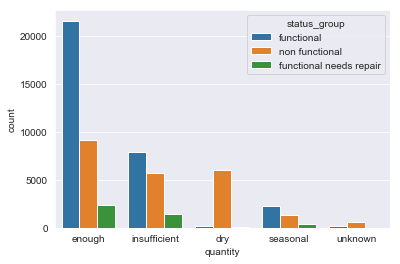

In [7]:
sns.countplot(x='quantity', data=train, hue='status_group');

In [8]:
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Labels

- amount_tsh : Total static head (amount water available to waterpoint)
- date_recorded : The date the row was entered
- funder : Who funded the well
- gps_height : Altitude of the well
- installer : Organization that installed the well
- longitude : GPS coordinate
- latitude : GPS coordinate
- wpt_name : Name of the waterpoint if there is one
- num_private :
- basin : Geographic water basin
- subvillage : Geographic location
- region : Geographic location
- region_code : Geographic location (coded)
- district_code : Geographic location (coded)
- lga : Geographic location
- ward : Geographic location
- population : Population around the well
- public_meeting : True/False
- recorded_by : Group entering this row of data
- scheme_management : Who operates the waterpoint
- scheme_name : Who operates the waterpoint
- permit : If the waterpoint is permitted
- construction_year : Year the waterpoint was constructed
- extraction_type : The kind of extraction the waterpoint uses
- extraction_type_group : The kind of extraction the waterpoint uses
- extraction_type_class : The kind of extraction the waterpoint uses
- management : How the waterpoint is managed
- management_group : How the waterpoint is managed
- payment : What the water costs
- payment_type : What the water costs
- water_quality : The quality of the water
- quality_group : The quality of the water
- quantity : The quantity of water
- quantity_group : The quantity of water
- source : The source of the water
- source_type : The source of the water
- source_class : The source of the water
- waterpoint_type : The kind of waterpoint
- waterpoint_type_group : The kind of waterpoint

In [9]:
# every time 
# drop id, scheme name, recorded_by

train = train.drop(columns=['id', 'scheme_name'])
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
a = train.date_recorded # keep for now, some duplicates 500+
b = train.funder # thinking we remove, there are a lot of different values (including zero and NaN)
c = train.installer # same as above, maybe we bin those with high counts vs low...
d = train.wpt_name # replace 'none', bin

e = train.basin # perfect, 9 categories

f = train.subvillage # 20k different values, '1', 'I', 'M'... bin?

g = train.region # perfect (8-20 variables)
h = train.lga # 125 count, need to expand elipses
i = train.ward # 2092 count, need to expand

j = train.public_meeting # perfect, only T/F

k = train.recorded_by # remove, only one value

l = train.scheme_management # perfect (8-20 variables)
m = train.permit # perfect, only T/F

n = train.extraction_type # perfect (8-20 variables)
o = train.extraction_type_group # almost same as n, high multicollinearity
p = train.extraction_type_class # almost same as n and o, high multicollinearity

q = train.management # perfect (8-20 variables)
r = train.management_group # perfect (8-20 variables)

s = train.payment # perfect (8-20 variables)
t = train.payment_type # almost same as s, high multicollinearity

u = train.water_quality # perfect (8-20 variables)
v = train.quality_group # almost same as u, high multicollinearity

w = train.quantity # perfect (8-20 variables)
x = train.quantity_group # almost same as w, high multicollinearity

y = train.source # perfect (8-20 variables)
z = train.source_type # almost same as y, high multicollinearity 

aa = train.source_class # perfect, 3 variables  

ab = train.waterpoint_type # perfect (8-20 variables)   
ac = train.waterpoint_type_group # almost same as ab, high multicollinearity

In [12]:
# run every categorical feature, interpret and note above

ab.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

## Pass 2

In [15]:
# nothing crazy for pass 2, categorically encode the easy variables, randomly select to remove multicollinearity
# remove those variables we may bin in the future and that need expanding to interpret

# drop date_recorded, funder, installer, wpt_name, subvillage, lga, ward, recorded_by, extraction_type_group
# drop extraction_type_class, payment_type, quality_group, quantity_group, source_type, waterpoint_type_group

train = train.drop(columns=['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 
                            'recorded_by', 'extraction_type_group', 'extraction_type_class', 'payment_type', 
                            'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group'])

print(train.shape)
train.head()

(59400, 24)


,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280,NaN,Other,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,NaN,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [16]:
train.isna().sum()

amount_tsh              0
gps_height              0
longitude               0
latitude                0
num_private             0
basin                   0
region                  0
region_code             0
district_code           0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
management_group        0
payment                 0
water_quality           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
status_group            0
dtype: int64

In [17]:
j.value_counts() # public meeting, replace with mode

True     51011
False     5055
Name: public_meeting, dtype: int64

In [18]:
train['public_meeting'] = train['public_meeting'].replace({np.nan:True})

In [19]:
l.value_counts() # scheme management, replace with none

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [20]:
train['scheme_management'] = train['scheme_management'].replace({np.nan:'None'})

In [21]:
m.value_counts() # permit, replace with mode

True     38852
False    17492
Name: permit, dtype: int64

In [22]:
train['permit'] = train['permit'].replace({np.nan:True})

In [23]:
train.isna().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
basin                0
region               0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
management_group     0
payment              0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
dtype: int64

In [24]:
# one hot encoding 
from sklearn.preprocessing import LabelEncoder

train['basin'] = LabelEncoder().fit_transform(train.basin)
train['region'] = LabelEncoder().fit_transform(train.region)
train['public_meeting'] = LabelEncoder().fit_transform(train.public_meeting)
train['scheme_management'] = LabelEncoder().fit_transform(train.scheme_management)
train['permit'] = LabelEncoder().fit_transform(train.permit)
train['extraction_type'] = LabelEncoder().fit_transform(train.extraction_type)
train['management'] = LabelEncoder().fit_transform(train.management)
train['management_group'] = LabelEncoder().fit_transform(train.management_group)
train['payment'] = LabelEncoder().fit_transform(train.payment)
train['water_quality'] = LabelEncoder().fit_transform(train.water_quality)
train['quantity'] = LabelEncoder().fit_transform(train.quantity)
train['source'] = LabelEncoder().fit_transform(train.source)
train['source_class'] = LabelEncoder().fit_transform(train.source_class)
train['waterpoint_type'] = LabelEncoder().fit_transform(train.waterpoint_type)
train['status_group'] = LabelEncoder().fit_transform(train.status_group)

In [47]:
# 0 = functional
# 2 = non functional
# 1 = functional needs repair

0    0.543081
2    0.384242
1    0.072677
Name: status_group, dtype: float64

In [26]:
X = train.drop(columns=['status_group'])
y = train.status_group

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 23), (14850, 23), (44550,), (14850,))

In [28]:
# logistic regression

log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_train)
accuracy_score(y_train, y_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6133333333333333

In [62]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9798204264870931

In [35]:
# lets turn them both in and see which is better

test = test_feat.drop(columns=['id', 'scheme_name','recorded_by'])
test = test.drop(columns=['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 
                            'extraction_type_group', 'extraction_type_class', 'payment_type', 
                            'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group'])
test = pd.DataFrame(test)
print(test.shape)
test.head()

(14358, 23)


,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type
0,0.0,1996,35.290799,-4.059696,0,Internal,Manyara,21,3,321,True,Parastatal,True,2012,other,parastatal,parastatal,never pay,soft,seasonal,rainwater harvesting,surface,other
1,0.0,1569,36.656709,-3.309214,0,Pangani,Arusha,2,2,300,True,VWC,True,2000,gravity,vwc,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe
2,0.0,1567,34.767863,-5.004344,0,Internal,Singida,13,2,500,True,VWC,NaN,2010,other,vwc,user-group,never pay,soft,insufficient,rainwater harvesting,surface,other
3,0.0,267,38.058046,-9.418672,0,Ruvuma / Southern Coast,Lindi,80,43,250,NaN,VWC,True,1987,other,vwc,user-group,unknown,soft,dry,shallow well,groundwater,other
4,500.0,1260,35.006123,-10.950412,0,Ruvuma / Southern Coast,Ruvuma,10,3,60,NaN,Water Board,True,2000,gravity,water board,user-group,pay monthly,soft,enough,spring,groundwater,communal standpipe


In [37]:
test['public_meeting'] = test['public_meeting'].replace({np.nan:True})
test['scheme_management'] = test['scheme_management'].replace({np.nan:'None'})
test['permit'] = test['permit'].replace({np.nan:True})

In [39]:
test['basin'] = LabelEncoder().fit_transform(test.basin)
test['region'] = LabelEncoder().fit_transform(test.region)
test['public_meeting'] = LabelEncoder().fit_transform(test.public_meeting)
test['scheme_management'] = LabelEncoder().fit_transform(test.scheme_management)
test['permit'] = LabelEncoder().fit_transform(test.permit)
test['extraction_type'] = LabelEncoder().fit_transform(test.extraction_type)
test['management'] = LabelEncoder().fit_transform(test.management)
test['management_group'] = LabelEncoder().fit_transform(test.management_group)
test['payment'] = LabelEncoder().fit_transform(test.payment)
test['water_quality'] = LabelEncoder().fit_transform(test.water_quality)
test['quantity'] = LabelEncoder().fit_transform(test.quantity)
test['source'] = LabelEncoder().fit_transform(test.source)
test['source_class'] = LabelEncoder().fit_transform(test.source_class)
test['waterpoint_type'] = LabelEncoder().fit_transform(test.waterpoint_type)

In [44]:
# log regression for y

y_pred = log_reg.predict(test)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,2
3,2
4,0


In [51]:
y_values = {0:'functional', 2:'non functional', 1:'functional needs repair'}
y_pred = y_pred.rename(columns={'0':'status_group'})
y_pred = y_pred.replace({"status_group": y_values})
y_pred.head()

,status_group
0,functional
1,functional
2,non functional
3,non functional
4,functional


In [52]:
id_column = pd.DataFrame(test_feat['id'])
second_lr = id_column.join(y_pred)
second_lr.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [53]:
second_lr.shape

(14358, 2)

In [54]:
# second_lr.to_csv('/Users/Chad/Taarifa and Tanzanian Water/second pass log reg.csv', index=None, header=True)
# second pass logistic regression scored a 0.60607

In [63]:
# clf for y

y_pred = clf.predict(test)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,0
3,2
4,0


In [65]:
y_values = {0:'functional', 2:'non functional', 1:'functional needs repair'}
y_pred = y_pred.rename(columns={0:'status_group'})
y_pred = y_pred.replace({"status_group": y_values})
y_pred.head()

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [66]:
id_column = pd.DataFrame(test_feat['id'])
second_rf = id_column.join(y_pred)
second_rf.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [67]:
second_rf.shape

(14358, 2)

In [68]:
second_rf.to_csv('/Users/Chad/Taarifa and Tanzanian Water/second pass random forest.csv', index=None, header=True)
# second pass random forest scored a 0.78924